<a href="https://colab.research.google.com/github/TakuInada/umcuEpi_longterm_ieeg_respect_bids/blob/master/PAC_tutorial_Brainstorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we do PAC (MVL) in line with the Brainstorm tutorial using tensorpac.

In [20]:
!pip install tensorpac
!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'axes.spines.top': False, 'axes.spines.right': False})

import warnings
warnings.filterwarnings("ignore")

#import numpy as np
#import matplotlib.pyplot as plt
#plt.rcParams.update({'axes.spines.top': False, 'axes.spines.right': False})

from tensorpac import Pac
from tensorpac.utils import PSD
from tensorpac.signals import pac_signals_tort
from tensorpac.signals import pac_signals_wavelet

In [22]:
# New dataset of signals artificially coupled between 6hz and 75hz :
n_epochs = 20    # number of trials
sf = 1024.        # sampling frequency
n_times = 6*sf # number of time points
T = n_times/sf  # length of time
# Create artificially coupled signals using Tort method :
#data, time = pac_signals_wavelet(f_pha=[5, 7], f_amp=[70, 80], sf=sf, n_times=n_times,
#                                 n_epochs=n_epochs, noise=1.0, pp = 180)
data, time = pac_signals_tort(f_pha=[5, 7], f_amp=[70, 80], sf=sf, n_times=n_times,
                                n_epochs=n_epochs, noise=1.0, dpha=10, damp=1)
print("data shape (n_epochs, n_times): ", data.shape)

data shape (n_epochs, n_times):  (20, 6144)


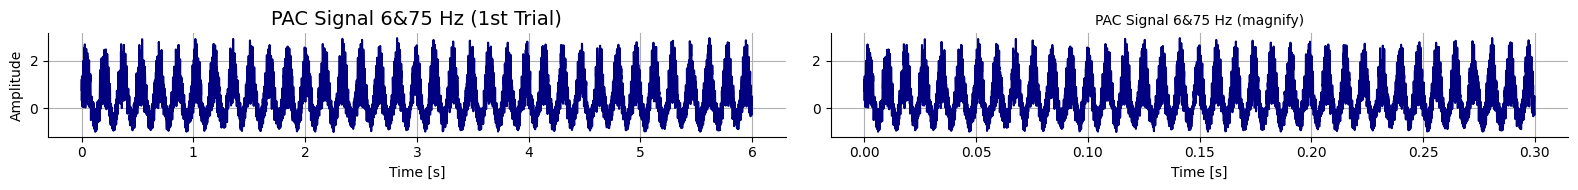

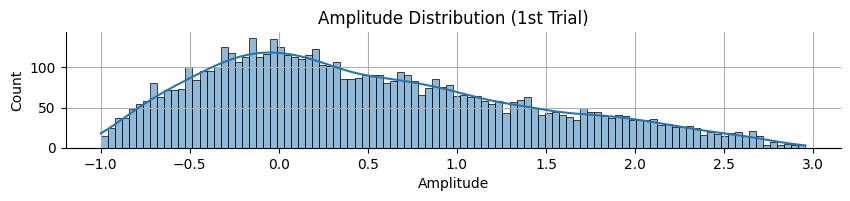

In [23]:
import seaborn as sns

plt.figure(figsize=(16, 2))
plt.subplot(1,2,1)
plt.plot(time, data[0], color='navy')
plt.title("PAC Signal 6&75 Hz (1st Trial)", fontsize=14)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(time/20, data[0], color='navy')
plt.title("PAC Signal 6&75 Hz (magnify)", fontsize=10)
plt.xlabel("Time [s]")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 1.5))
sns.histplot(data[0], bins=100, kde=True)
plt.title("Amplitude Distribution (1st Trial)")
plt.xlabel("Amplitude")
plt.grid(True)
plt.show()

Check the trials and waves

Compute PSD over 20 trials and 6144 time points
INFO:tensorpac:Compute PSD over 20 trials and 6144 time points
    Add 95th confidence interval
INFO:tensorpac:    Add 95th confidence interval


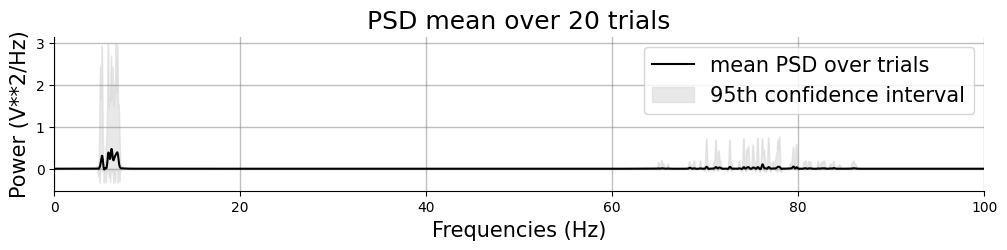

In [28]:
from tensorpac.utils import PSD

psd = PSD(data, sf)
# Create a figure and axes with the desired figsize using matplotlib.pyplot
fig, ax = plt.subplots(figsize=(12, 2))
# Call the PSD.plot method with the axes object
psd.plot(f_max=100, confidence=95, interp=10)
plt.show() # Display the plot

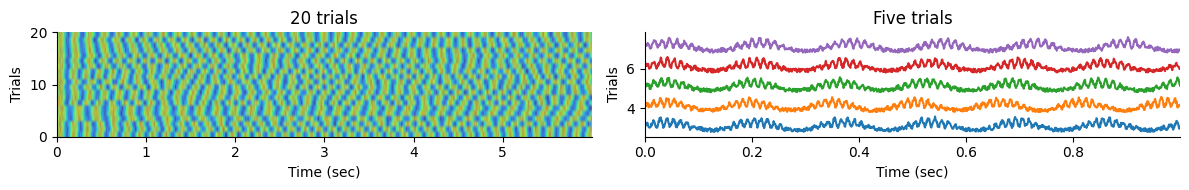

In [34]:
plt.figure(figsize=(12, 2))
plt.subplot(1,2,1)
plt.title(str(n_epochs)+" trials")
plt.imshow(data, cmap="turbo", extent=(0,T,0,n_epochs), aspect='auto')
plt.xlim(0, time[-1]); plt.xlabel("Time (sec)"); plt.ylabel("Trials")
plt.subplot(1,2,2)
plt.title("Five trials")
for i in range(5):
    plt.plot(time, data[i]*0.2+i+3)
plt.xlim(0, time[-1]/6); plt.xlabel("Time (sec)"); plt.ylabel("Trials")
plt.tight_layout()

Calculate and plot PAC

Phase Amplitude Coupling object defined
INFO:tensorpac:Phase Amplitude Coupling object defined


PAC method:  Mean Vector Length (MVL, Canolty et al. 2006)
Surrogates:  Swap amplitude time blocks (Bahramisharif et al. 2013)
Normalization:  Substract the mean and divide by the deviation of the surrogates


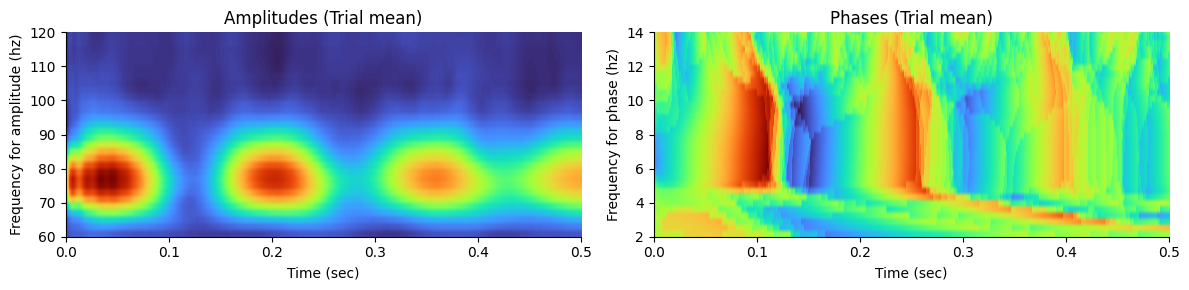

In [36]:
# Define a Pac object
p = Pac(idpac=(1, 2, 4), f_pha='hres', f_amp='hres')
f_amp, f_pha = np.mean(p.f_amp, 1), np.mean(p.f_pha, 1)
#p = Pac(idpac=(6, 2, 1), f_pha='hres', f_amp='hres')

# extract all of the phases and amplitudes
phases = p.filter(sf, data, ftype='phase', n_jobs=1)
amplitudes = p.filter(sf, data, ftype='amplitude', n_jobs=1)
print("PAC method: ", p.method)
print("Surrogates: ", p.str_surro)
print("Normalization: ", p.str_norm)

plt.figure(figsize=(12, 3))
# Plot your time-resolved PAC (f_amp)
plt.subplot(1,2,1)
plt.title("Amplitudes (Trial mean)")
plt.imshow(np.mean(amplitudes, 1)[::-1], cmap="turbo", extent=(0,T,f_amp[0],f_amp[-1]), aspect='auto')
plt.xlabel("Time (sec)"); plt.xlim(0, T/12);
plt.ylabel('Frequency for amplitude (hz)')
plt.ylim(60, 120)
# Plot your time-resolved PAC (f_pha)
plt.subplot(1,2,2)
plt.title("Phases (Trial mean)")
plt.imshow(np.mean(phases, 1)[::-1], cmap="turbo", extent=(0,T,f_pha[0],f_pha[-1]), aspect='auto')
plt.xlabel("Time (sec)"); plt.xlim(0, T/12);
plt.ylabel('Frequency for phase (hz)')
plt.ylim(2, 14)
plt.tight_layout()

Statistical check and comodulogram

    extract phases (n_pha=50) and amplitudes (n_amps=50)
INFO:tensorpac:    extract phases (n_pha=50) and amplitudes (n_amps=50)
    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
INFO:tensorpac:    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=8947)
INFO:tensorpac:    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=8947)
    infer p-values at (p=0.05, mcp=maxstat)
INFO:tensorpac:    infer p-values at (p=0.05, mcp=maxstat)
    normalize true PAC estimation by surrogates (Substract the mean and divide by the deviation of the surrogates)
INFO:tensorpac:    normalize true PAC estimation by surrogates (Substract the mean and divide by the deviation of the surrogates)
    infer p-values at (p=0.05, mcp=maxstat)
INFO:tensorpac:    infer p-values at (p=0.05, mcp=maxstat)


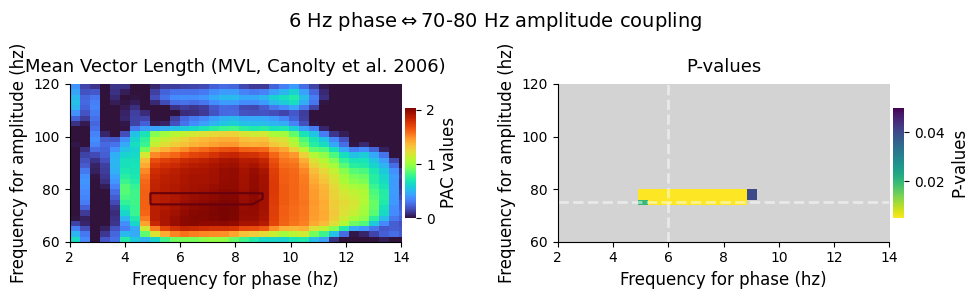

In [37]:
# Fileter the data and extract pac
n_perm = 200 # > 1/0.05
xpac = p.filterfit(sf, data, n_perm=n_perm, n_jobs=-1).squeeze()
pval = p.infer_pvalues(p=0.05) # get the corrected p-values

plt.figure(figsize=(10, 3))
plt.suptitle("6 Hz phase$\Leftrightarrow$70-80 Hz amplitude coupling", fontsize=14)
plt.subplot(1,2,1)
# Plot your comodulogram
p.comodulogram(xpac.mean(-1), title=p.method,
               cmap="turbo", vmin=0, pvalues=pval, levels=.05)
plt.xlim(2, 14)
plt.ylim(60, 120)
plt.subplot(1,2,2)
p.comodulogram(pval, title='P-values', cblabel='P-values', cmap='viridis_r', vmin=1. / n_perm,
               vmax=.05, over='lightgray')
plt.axvline(x=6, color="white", linestyle="dashed", linewidth=2, alpha=0.5)
plt.axhline(y=75, color="white", linestyle="dashed", linewidth=2, alpha=0.5)
plt.xlim(2, 14)
plt.ylim(60, 120)
plt.tight_layout()